In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define function that incorporates a a quadratic term as a drag
g = 9.8
c_d=.45
rho=1
area= 1.26*10**-3 #cross sectional area of ping pong ball in m^2
mass=2.7*10**-3 #mass of ping pong ball in kg
# gamma = .5*(1/mass)*rho*area*c_d
gamma = 0.01

def drag(v_):
  """
  Function that incorporates a quadratic term as a drag
  Parameters
  ----------
  v_ : Float
        Value of v
  g : Float
        Value of g
  """
  return - gamma*np.square(v_) + g

# Implementing solver as a function
def rk4_drag(f,t0,tN, N):
  """
  Runge-Kutta Implementation:

  """
  t = np.linspace(t0, tN, N)
  v = np.zeros(N)
  y = np.zeros(N)
  h = (tN-t0)/N
  for n in range(1,N):
    k1 = h*f(v[n-1]       )
    k2 = h*f(v[n-1] + k1/2)
    k3 = h*f(v[n-1] + k2/2)
    k4 = h*f(v[n-1] + k3  )

    v[n] = v[n-1] + (k1 + 2*k2 + 2*k3 + k4)/6
    y[n] = y[n-1] + v[n]*h
  return t, y, v

  
def adaptive_drag(f, t0, tN, h_initial, eps=1e-3, h_min=1e-4, h_max=1.0):
    t = [t0]
    v = [0]  # Initial condition v(t0) = 0
    y = [0]  # Initial condition y(t0) = 0
    h = h_initial

    while t[-1] < tN:
        v_current = v[-1]
        t_current = t[-1]

        # Midpoint Rule (2nd order RK)
        k1 = f(v_current)
        k2 = f(v_current + h/2 * k1)
        v_next = v_current + h * k2

        # Error Estimation (using embedded Euler step)
        v_euler = v_current + h * k1  # Simple Euler step
        error = abs(v_next - v_euler)

        # Step Size Adjustment
        if error < eps:
            t.append(t_current + h)
            v.append(v_next)
            y.append(y[-1] + v_next*h) #updating y position
            h = min(h * 1.2, h_max)  # Increase step size slightly
        else:
            h = max(h * 0.5, h_min)  # Decrease step size

        if h < h_min:
            raise ValueError("Step size too small. Consider reducing tolerance or increasing h_min.")

    return np.array(t), np.array(y), np.array(v)

In [3]:
# Define initial conditions and number of steps
t0 = 0
tf = 20.0
N  = 50
h_initial = 0.1 # Initial step size
# Solve the ODE
solver_drag = rk4_drag(drag,t0,tf, N)
solver_adap = adaptive_drag(drag, t0, tf, h_initial)

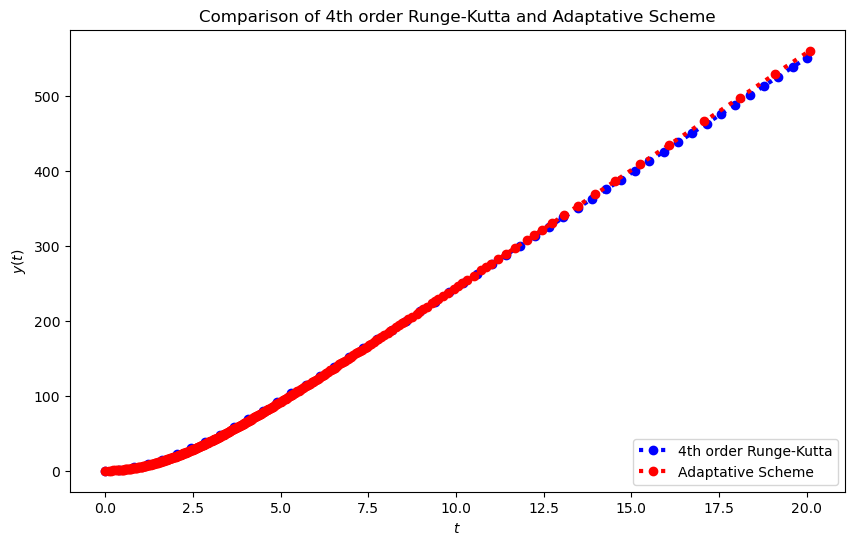

In [5]:
# Plot the solution
plt.figure(figsize=(10,6))
plt.plot(solver_drag[0],solver_drag[1],':bo' , linewidth=3.0,label=r'4th order Runge-Kutta')
plt.plot(solver_adap[0],solver_adap[1],':ro' , linewidth=3.0,label=r'Adaptative Scheme')
plt.ylabel(r'$y(t)$')
plt.xlabel(r'$t$')
plt.title(r'Comparison of 4th order Runge-Kutta and Adaptative Scheme')
plt.legend(loc=4)
plt.show()

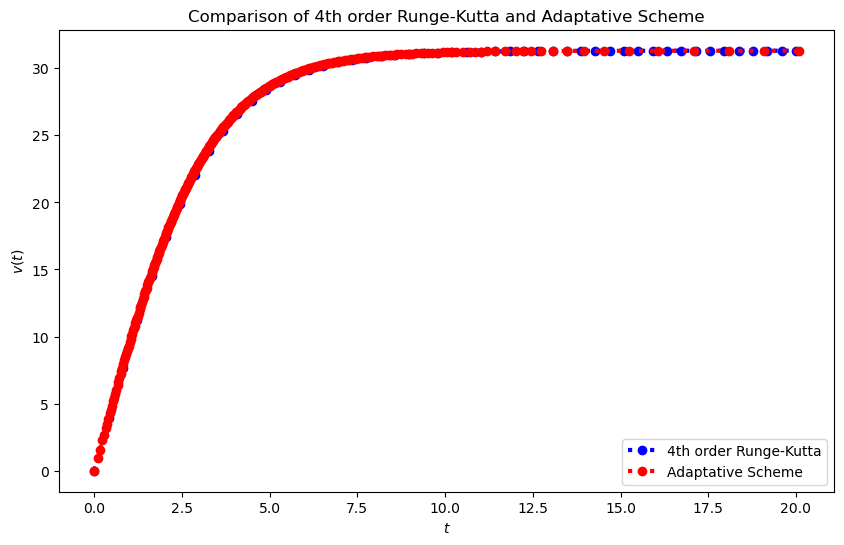

In [6]:
# Plot the solution
plt.figure(figsize=(10,6))
plt.plot(solver_drag[0],solver_drag[2],':bo' , linewidth=3.0,label=r'4th order Runge-Kutta')
plt.plot(solver_adap[0],solver_adap[2],':ro' , linewidth=3.0,label=r'Adaptative Scheme')
plt.ylabel(r'$v(t)$')
plt.xlabel(r'$t$')
plt.title(r'Comparison of 4th order Runge-Kutta and Adaptative Scheme')
plt.legend(loc=4)
plt.show()